https://www.gmpuzzles.com/blog/2016/01/snake-egg-by-serkan-yurekli/

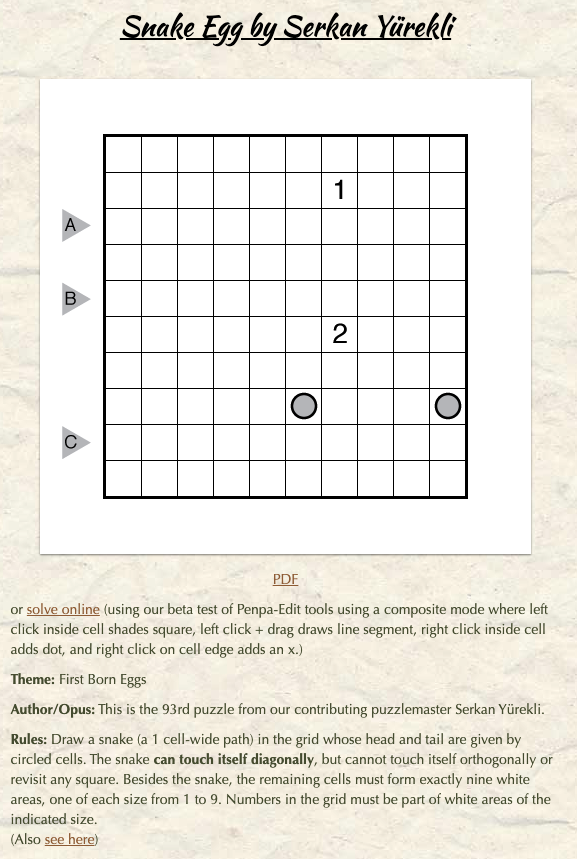

### Sets
- S: set of squares
- K: set of square types = {0, ..., 9} (0 is the snake, 1-9 are the blocks)
- $N_s \subset S$: neighbours of square $s \in S$

### Data
- $Pre_s \in {-1} \cup K$: Pre assgined square type for sqaure $s \in S$, -1 means no assigned value

### Variables
- $x_{sk} \in \{0,1\}$ indicates if square s has type k



### Constraints
- $k$ squares of type $k \forall k \in \{1, ...\}$

$\sum_{s \in S} x_{sk} = k \forall k \in k, k \geq 1$

- One type per cell 

$\sum_{k \in K} x_{sk} = 1 \forall s \in S$

- Match pre assignments

$x_{s pre_s} = 1 \forall s \in S, Pres_s \geq 0$

- Exactly one snake neigh for orig / dest

$\sum_{s' \in N_s} x_{s'0} = 1 \forall s \in S, Pre_s = 0$

- Can only touch same type or snake

$x_{s, k} + \sum_{k' \in K, k' > 0, k' \neq k} x_{{s_2} k'} \leq 1 \forall s_1 \in S, s_2 \in N_{s_1}, \forall k \in K, k \geq 1 $

$x_{{s_1} k} + x_{{s_2} k'} \neq 1 \forall s_1 \in S, s_2 \in N_{s_1}, k \in K, k \geq 1, k' \in K \ \{0, k\}$

- Must touch one of the same type

$x_{s k} \leq \sum_{s' \in N_s} x_{s' k} \forall s \in S, k \in K, k \geq 2$

- AT LEAST two snake squares touch each snake square, unless it is the origin or the destination

$\sum_{s' \in N_s} x_{s' 0} \geq 2 x_{s 0} \forall s \in S, Pre_s = -1$

- AT MOST two snake squares touch each snake square, unless it is the origin or the destination

$\sum_{s' \in N_s} x_{s' 0} \leq 2 + 2 (1 - x_{s 0}) \forall s \in S, Pre_s = -1$



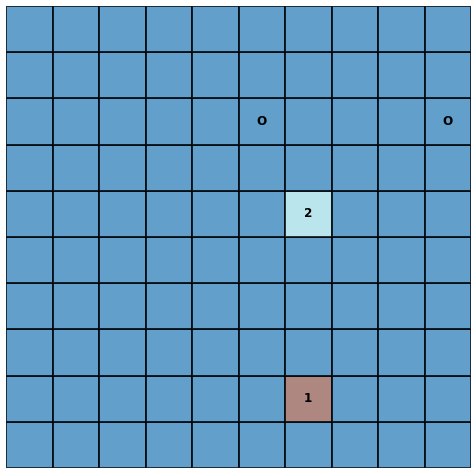

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[arm] - Darwin 24.5.0 24F74)

CPU model: Apple M4 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 4447 rows, 1000 columns and 36093 nonzeros
Model fingerprint: 0x5a2a51bf
Variable types: 0 continuous, 1000 integer (1000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Presolve removed 2128 rows and 399 columns
Presolve time: 0.05s
Presolved: 2319 rows, 601 columns, 14271 nonzeros
Variable types: 0 continuous, 601 integer (601 binary)

Root relaxation: objective 0.000000e+00, 531 iterations, 0.01 seconds (0.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0  122          -    0.00000      -     -    0s
H    0     0  

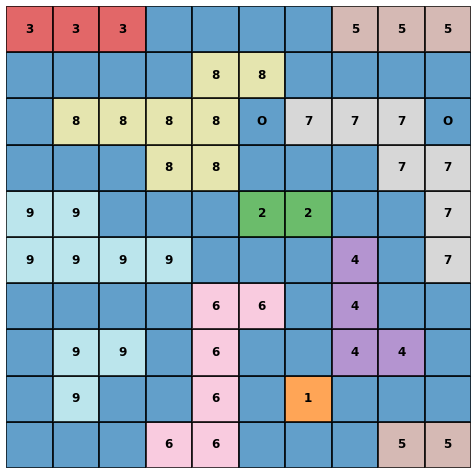

0 [{(5, 4), (4, 6), (8, 0), (5, 7), (9, 5), (8, 3), (8, 9), (0, 5), (8, 6), (2, 5), (1, 9), (6, 2), (6, 5), (4, 5), (3, 9), (4, 8), (3, 6), (5, 3), (8, 2), (9, 4), (0, 7), (8, 8), (1, 5), (6, 1), (7, 0), (1, 8), (7, 9), (6, 7), (5, 2), (4, 4), (3, 8), (9, 3), (5, 8), (8, 1), (8, 7), (9, 6), (0, 6), (2, 9), (1, 7), (2, 6), (6, 0), (6, 6), (7, 5)}, {(0, 1), (1, 2), (0, 0), (3, 1), (2, 0), (3, 0), (2, 3), (0, 2), (3, 3), (1, 0), (3, 2), (1, 3)}]
1 [{(1, 6)}]
2 [{(5, 5), (5, 6)}]
3 [{(9, 0), (9, 1), (9, 2)}]
4 [{(3, 7), (4, 7), (2, 7), (2, 8)}]
5 [{(9, 7), (9, 8), (9, 9)}, {(0, 8), (0, 9)}]
6 [{(2, 4), (1, 4), (0, 4), (3, 4), (0, 3), (3, 5)}]
7 [{(7, 6), (7, 7), (4, 9), (5, 9), (6, 8), (6, 9), (7, 8)}]
8 [{(7, 4), (7, 1), (8, 4), (6, 4), (7, 3), (7, 2), (6, 3), (8, 5)}]
9 [{(4, 0), (5, 0), (4, 3), (4, 1), (5, 1), (4, 2)}, {(1, 1), (2, 1), (2, 2)}]


In [ ]:
import matplotlib.pyplot as plt
import gurobipy as gp

# Plot a solution
def PlotBoard(Sol, Pre):
    plt.figure(figsize=(len(Pre), len(Pre)), dpi=60)
    plt.pcolormesh(Sol, cmap='tab20', alpha=0.7, edgecolors='k', linewidth=2)
    plt.axis(False)
    for i in N:
        for j in N:
            if Sol[i][j] > 0.9:
                plt.text(j+.5, i+.5, str(Sol[i][j]), ha='center', 
                         va='center', fontsize='x-large', fontweight='black')
            if Pre[i][j] == 0:
                plt.text(j+.5, i+.5, "O", ha='center', va='center',
                         fontsize='x-large', fontweight='black')
    plt.show()

if False:
    K = range(6)
    Pre = [
        [-1, 2,-1, 0,-1,-1],
        [-1,-1,-1,-1,-1,-1],
        [-1,-1,-1,-1,-1,-1],
        [-1,-1, 0,-1,-1,-1],
        [-1,-1,-1,-1,-1,-1],
        [-1,-1,-1,-1,-1,-1]]

else:
    K = range(10)
    Pre = [
        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],
        [-1,-1,-1,-1,-1,-1, 1,-1,-1,-1],
        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],
        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],
        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],
        [-1,-1,-1,-1,-1,-1, 2,-1,-1,-1],
        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],
        [-1,-1,-1,-1,-1, 0,-1,-1,-1, 0],
        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],
        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]]

# Board indices
N = range(len(Pre))

# Plot blank board
PlotBoard([[(Pre[i][j] if (Pre[i][j]>=0) else 0) for j in N] for i in N], Pre)

# Set of squares
S = {(i, j) for i in N for j in N}

# Neighbours
def GetNeigh(i, j):
    return S.intersection(
        {(i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)})

# Generate sets of neighbours
Neigh = {s: GetNeigh(*s) for s in S}

m = gp.Model()

# Vars
X = {
    (s, k):
    m.addVar(vtype=gp.GRB.BINARY)
    for s in S for k in K
}

# Constraints
k_sqaures = {
    k:
    m.addConstr(gp.quicksum(X[s, k] for s in S) == k)
    for k in K[1:]
}

one_type_per_cell = {
    s:
    m.addConstr(gp.quicksum(X[s,k] for k in K) == 1)
    for s in S
}

match_pre_assignments = {
    s:
    m.addConstr(X[s, Pre[s[0]][s[1]]] == 1)
    for s in S
    if Pre[s[0]][s[1]] >= 0
}

exactly_one_snake_neighbour_for_pre_0 = {
    s:
    m.addConstr(gp.quicksum(X[ss, 0] for ss in Neigh[s]) == 1)
    for s in S
    if Pre[s[0]][s[1]] == 0
}

only_tocuh_same_type_or_snake = {
    (s1, s2, k):
    m.addConstr(
        X[s1, k] 
        + gp.quicksum(X[s2, kk] for kk in K[1:] if kk != k) <= 1
    )
    for s1 in S
    for s2 in Neigh[s1]
    for k in K[1:]
}

must_touch_one_of_same_type = {
    (s, k):
    m.addConstr(X[s, k] <= gp.quicksum(X[ss, k] for ss in Neigh[s]))
    for s in S
    for k in K 
    if k != 1
}

at_least_2_snake_neighbours_for_snake_sqaure = {
    s:
    m.addConstr(gp.quicksum(X[ss, 0] for ss in Neigh[s]) >= 2 * X[s,0])
    for s in S
    if Pre[s[0]][s[1]] == -1
}

at_most_2_snake_neighbours_for_snake_sqaure = {
    s:
    m.addConstr(gp.quicksum(X[ss, 0] for ss in Neigh[s]) <= 2 + 2 * (1 - X[s,0]))
    for s in S
    if Pre[s[0]][s[1]] == -1
}



def BuildRegion(s, Val):
    """
    Recursively build the region starting at s
    Return a set
    Side effect of switching val to -1 for all squares in the region
    """
    tSet = {s}
    k = Val[s]
    Val[s] = -1
    for ss in Neigh[s]:
        if Val[ss] == k:
            tSet |= BuildRegion(ss, Val)

    return tSet

# Run!
while True:
    m.optimize()

    PlotBoard(
        [[
            sum(k * round(X[(i, j), k].x) for k in K)
            for j in N
            ]
            for i in N
        ],
        Pre
    )

    Val = {s: sum(k * round(X[s, k].x) for k in K) for s in S}

    # Find disconnected regions and cut them off
    Regions = {k: [] for k in K}

    for s in S:
        if Val[s] >= 0:
            Regions[Val[s]].append(BuildRegion(s, Val))
    
    CutsAdded = 0
    sOrig = min(s for s in S if Pre[s[0]][s[1]] == 0)  # Find an origin square
    for k in K:
        if len(Regions[k] == 1):
            continue
        # Cut off every region
        if k == 0:
            for rSet in Regions[k]:
                if sOrig not in rSet:
                    CutsAdded += 1
                    m.addConstr(
                        gp.quicksum(X[s, 0] for s in rSet)
                        <= len(rSet) - 1
                    )
    



    if CutsAdded == 0:
        break

# for k, v in Regions.items():
#     print(k,v)

